In [1]:
# .\HoML\Scripts\activate

In [2]:
### the function to fetch the data 

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [2]:
### os module example 

In [3]:
# import 
import os 

# get current working directory 
cwd = os.getcwd()
print(cwd)

# get cwd before 
# os.chdir('../')
# cwd = os.getcwd()
# print(cwd)

# create a directory 
# os.mkdir()
# os.makedirs() 

# list the files 
# path = '/'
# dir_list = os.listdir(path) 
# print(dir_list )



C:\Users\JZ\Hands_on_ML


In [4]:
### now load the data 

import pandas as pd 

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
### look at the data  

housing = load_housing_data() 
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


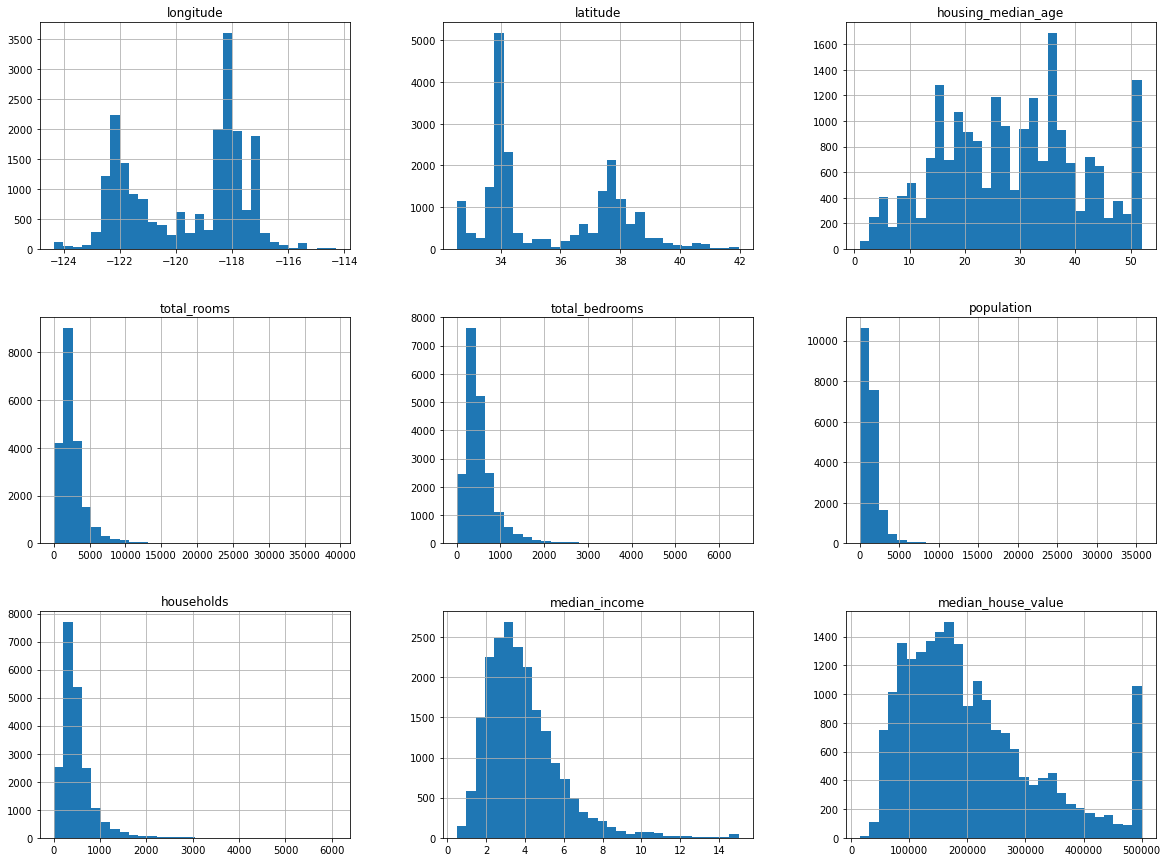

In [7]:
### plot the data 

### calling hist 

import matplotlib.pyplot as plt 
housing.hist(bins = 30, figsize = (20, 15))
plt.show() 

In [8]:
### split to the train & test set with sklearn 

from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
# Page 78 

In [10]:
### stratified sampling 

### keep the origin ratio 

# divide the median by 1.5 
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
# merging all > 5 to 5 cat 
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [11]:
### using SK: StratifiedShuffleSplit 

from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
# look at the income cat proportions 
housing["income_cat"].value_counts()/len(housing )

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
# remove the income cat 
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

### Discover and Visualize the Data 

In [15]:
# make copy 
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

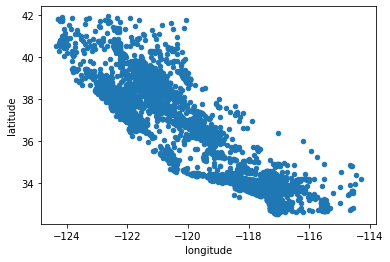

In [16]:
### geographical visualing 

housing.plot(kind = "scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

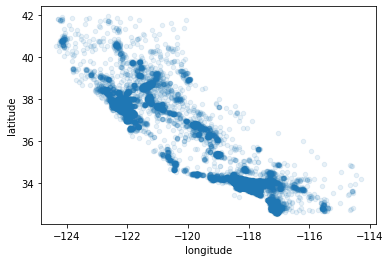

In [19]:
# view the density 
housing.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.1)

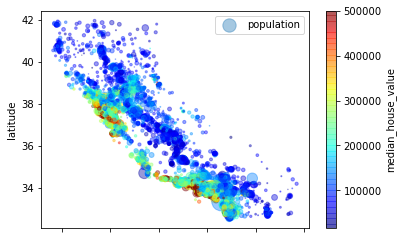

In [21]:
### using a color map called jet 

### use raidus for population and color for prices

housing.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.4,
            s = housing["population"]/100, label = "population",
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,
            )
plt.legend() 

In [23]:
### looking for correlations 

corr_matrix = housing.corr() 

In [24]:
# for median_house 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

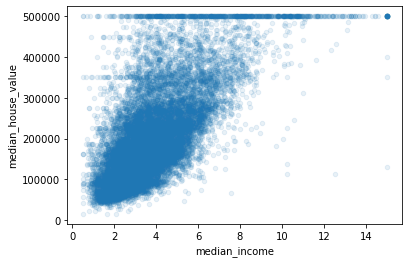

In [26]:
# more corr on P85 

# we can plot the scatter matirx in pandas.tools.plotting 

# plot the strong corrlation 
housing.plot(kind="scatter", x="median_income", y="median_house_value",
    alpha=0.1)

In [27]:
### exploring new attribute 

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [28]:
# the corr 
corr_matrix = housing.corr() 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### prepare the data for ML 

In [31]:
###  separate the taget 

housing = strat_train_set.drop("median_house_value", axis =1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
### for missing data 

# drop the districts 
housing.dropna(subset=["total_bedrooms"]) 
# drop the whole attribute 
housing.drop("total_bedrooms", axis=1)
# fill in with some value 
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [36]:
### using sklearn: imputer 

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "median")

In [37]:
# remove text attr
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [38]:
# fit the imputer 
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
### transform the data set for training 

X = imputer.transform(housing_num)

# to pandas
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

### Handling Text and Categorical Attributes 

In [40]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"] 
housing_cat_encoded = encoder.fit_transform(housing_cat) 
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [41]:
print(encoder.classes_)

#Page92

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [42]:
### one-hot encoding with sklearn 

from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder() 
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot 

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# could also use LabelBinarizer with sparse_output=True in Sklearn 


### feature scaling 

In [45]:
### normalization and standardization 

### Sklearn: MinMaxScaler & StandardScaler 

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [56]:

from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [58]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [60]:
### col transformation 

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [61]:
housing_prepared.shape

(16512, 16)

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [66]:
### the whole pipeline 

"""from sklearn.pipeline import FeatureUnion 

num_attribs = list(housing_num) 
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])"""


'from sklearn.pipeline import FeatureUnion \n\nnum_attribs = list(housing_num) \ncat_attribs = [\'ocean_proximity\']\n\nnum_pipeline = Pipeline([\n    (\'selector\', DataFrameSelector(num_attribs)),\n    (\'imputer\', SimpleImputer(strategy="median")),\n    (\'attribs_adder\', CombinedAttributesAdder()),\n    (\'std_scaler\', StandardScaler()),\n    ])\ncat_pipeline = Pipeline([\n    (\'selector\', DataFrameSelector(cat_attribs)),\n    (\'label_binarizer\', LabelBinarizer()),\n    ])\nfull_pipeline = FeatureUnion(transformer_list=[\n    ("num_pipeline", num_pipeline),\n    ("cat_pipeline", cat_pipeline),\n    ])'

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [68]:

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [69]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [70]:

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [71]:
np.allclose(housing_prepared, old_housing_prepared)

True

### Select and train a model 

In [72]:
### using linear regression 

from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [73]:
### try out with some data

some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) 
print("predcitions: \t", lin_reg.predict(some_data_prepared))

predcitions: 	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [75]:
print("labels: \t", list(some_labels))

labels: 	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [78]:
### measure the RMSE 

from sklearn.metrics import mean_squared_error 

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

68628.19819848923

In [79]:
### might be underfitting 

### try a more complex model 

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [83]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# the score of tree
display_scores(tree_rmse_scores)

Scores: [67932.62362057 66829.17585308 71498.24941445 68909.33179037
 70047.47287554 75304.63817072 70749.96358803 71381.70125926
 77199.75836269 69797.35037233]
Mean: 70965.02653070311
Standard deviation: 3015.6307494258176


In [85]:
# the score of lin_reg 
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798346


In [91]:
### random forest 

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
#forest_rmse

NameError: name 'forest_rmse' is not defined

In [86]:
### TIP 

### save the parameters 

# from sklearn.externals import joblib 


### fine tuning the model 

In [92]:
### the GridSearchCV from sklearn 

from sklearn.model_selection import GridSearchCV 

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]}, 
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

forest_reg = RandomForestRegressor() 

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                          scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [93]:
# best param 
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [94]:
# best estimator 
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [95]:
# the evaluation scores 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64950.11209085275 {'max_features': 2, 'n_estimators': 3}
55821.177418265754 {'max_features': 2, 'n_estimators': 10}
53034.83238091635 {'max_features': 2, 'n_estimators': 30}
59179.23512206446 {'max_features': 4, 'n_estimators': 3}
52473.574976518605 {'max_features': 4, 'n_estimators': 10}
50272.55386015409 {'max_features': 4, 'n_estimators': 30}
59121.06321226002 {'max_features': 6, 'n_estimators': 3}
52228.23088446008 {'max_features': 6, 'n_estimators': 10}
50015.18218002522 {'max_features': 6, 'n_estimators': 30}
58786.333128235 {'max_features': 8, 'n_estimators': 3}
52890.74639195519 {'max_features': 8, 'n_estimators': 10}
50269.98918717564 {'max_features': 8, 'n_estimators': 30}
61877.912258554024 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54964.87469864761 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60333.42055835456 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52365.81185822935 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [96]:
### Other params search 

# Randomized Search 

# Ensemble Method 

In [97]:
### Analyze the best models and their errors 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.35238888e-02, 6.75272210e-02, 4.47483972e-02, 1.75917015e-02,
       1.67907483e-02, 1.82634340e-02, 1.73083273e-02, 3.69910981e-01,
       4.77248941e-02, 1.12751288e-01, 6.68517207e-02, 1.24946799e-02,
       1.25661856e-01, 1.07049848e-04, 2.77213835e-03, 5.97167496e-03])

In [99]:
# list importance scores with names 

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36991098066416267, 'median_income'),
 (0.12566185561005846, 'INLAND'),
 (0.11275128792949378, 'pop_per_hhold'),
 (0.07352388879162987, 'longitude'),
 (0.06752722095578756, 'latitude'),
 (0.06685172071234632, 'bedrooms_per_room'),
 (0.04772489407284827, 'rooms_per_hhold'),
 (0.04474839719407978, 'housing_median_age'),
 (0.018263433975229792, 'population'),
 (0.017591701503578968, 'total_rooms'),
 (0.017308327276819503, 'households'),
 (0.016790748259225892, 'total_bedrooms'),
 (0.012494679894085882, '<1H OCEAN'),
 (0.005971674960159529, 'NEAR OCEAN'),
 (0.002772138352159282, 'NEAR BAY'),
 (0.00010704984833437421, 'ISLAND')]

In [100]:
### Final evaluation on the test set 

final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 48,209.6

In [101]:
final_rmse

48135.61692446192